# Clustering Jerárquico



Como su nombre lo indica, el clustering Jerárquico construye una jerarquía de clusters para realizar el análisis y existen dos categorías para este tipo de clustering:

* Aglomerante
* Divisivo

Para representar los resultados de la jerarquía de grupos se usa el dendograma que muestra las jerarquías de acuerdo a las distancias que existen entre los elementos del conjunto de datos, las cuales se pueden representar en una matriz de distancias.

![Alt text](image-5.png)

![Alt text](image-6.png)

## Clustering Jerárquico Aglomerante

Es una aproximación de abajo hacia arriba (bottom-up) donde se dividen los clusters en subclusters y así sucesivamente.
- Se inicia asignando cada muestra simple a un cluster y en cada iteración sucesiva va aglomerando (mezclando) el par de clusters más cercanos satisfaciendo algún criterio de similaridad, hasta que todos los elementos pertenecen a un solo cluster.
- Los clusters generados en los primeros pasos son anidados con los clusters generados en los siguientes pasos.

El proceso de cluster aglomerante es el siguiente:

- Primero asigna cada elemento a un cluster
- Después encuentra la matriz de distancias
- Encuentra 2 clusters que tengan la distancia más corta y los mezcla
- Continua este proceso hasta que se forma un solo cluster grande


El siguiente diagrama muestra el proceso aglomerante

![](007-02.png)

## Clustering Jerárquico Divisivo

Este tipo de clustering se lleva a cabo con un enfoque de arriba hacia abajo (top-down).
- Se inicia con todos los elementos asignado a un solo cluster y sigue el algoritmo hasta que cada elemento es un cluster individual.

El siguiente diagrama muestra el proceso divisivo

![](007-03.png)

Para ambos casos, la medida de distancia que se utiliza para generar los clusters es comúnmente la distancia euclidiana.
- Se puede seleccionar otro método de acuerdo la relevancia del problema, pero, generalmente la distancia euclidiana es la más eficiente si no existen restricciones en el modelo.

## Ejemplo

Dataset: Clientes_Tienda.csv

Contiene 200 registros de una tienda que ha calificado a sus clientes con una puntuación que va de 1 a 100 de acuerdo a su frecuencia de compra (gasto) y otras condiciones que ha utilizado dicha tienda para calificar a sus clientes con esa puntuación.
- Información adicional sobre género, edad e ingreso anual en miles, de los cliente.
- Sin embargo, para poder graficar los resultados sólo utilizaremos el ingreso anual y la puntuación para generar los grupos de clientes, y analizar dicho resultado con el enfoque aglomerante.

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('../dataset/Clientes_Tienda.csv')
df = df.drop(columns=['CustomerID'])
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


Seleccionamos las variables

In [16]:
# Cambiar las etiquetas de columnas
df.columns = ['Genero', 'Edad', 'Ingresos', 'ScoreGasto']
df.head()

,Genero,Edad,Ingresos,ScoreGasto
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [17]:
df.isnull().sum()

Genero        0
Edad          0
Ingresos      0
ScoreGasto    0
dtype: int64

In [18]:
df["genero"] = df["Genero"].astype('category').cat.codes
df.head()

,Genero,Edad,Ingresos,ScoreGasto,genero
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,0
3,Female,23,16,77,0
4,Female,31,17,40,0


In [19]:
X = df[["Edad", "Ingresos", "ScoreGasto", "genero"]].values

Verificamos si existen valores perdidos

Para crear el dendograma utilizamos la clase `dendrogram` del paquete scipy.hierarchy
- Que puede permitirnos determinar el número óptimo de cluster

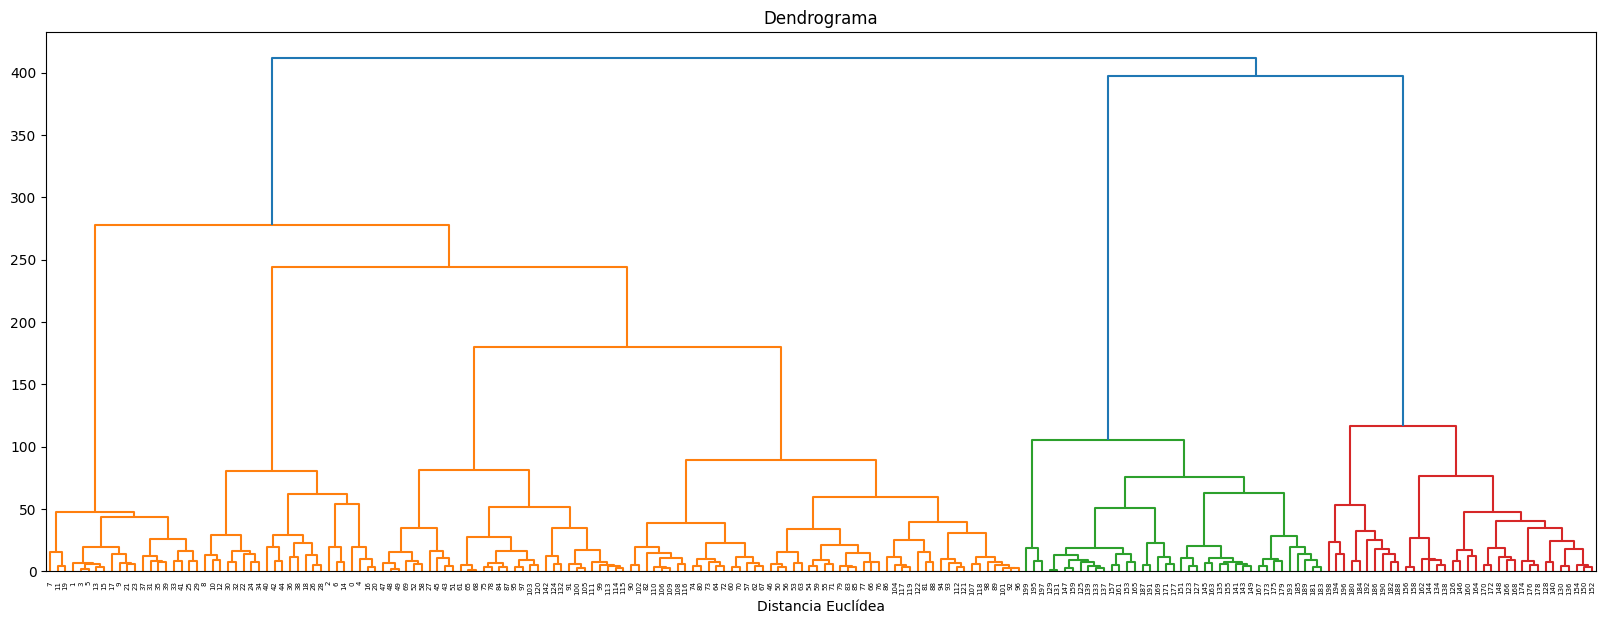

In [20]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(20, 7))
linked = linkage(X, method='ward', metric='euclidean')
dendrogram(linked, orientation='top',show_leaf_counts=True)
plt.title('Dendrograma')
plt.xlabel('Distancia Euclídea')
plt.show()

En el podemos observar que la distancia máxima, la marca la línea azul,  que une los clusters verde y rojo, por lo que si realizamos el corte en esa zona obtenemos:

![](007-05.png)

Al marcar con la línea color azul el dendograma donde observamos la distancia máxima, nos genera 5 clusters que hemos marcado con números.

Con ello en mente, generamos los grupos con el método aglomerante utilizando la clase AgglomerativeClustering del paquete sklearn.cluster

In [21]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, linkage='ward')
y_hc = hc.fit_predict(X)

- En la variable `y_hc` se guardan los grupos asignados a cada cliente o renglón del conjunto de datos.
- En ese vector podemos observar los 5 grupos que van de 0 a 4

In [22]:
Cluster = pd.DataFrame(y_hc, columns=['Clientes'])
Cluster.value_counts().sort_index()

Clientes
0           83
1           35
2           39
3           20
4           23
Name: count, dtype: int64

Para poder observar gráficamente la asignación de los 200 clientes a 5 grupos o clusters realizamos lo siguiente:

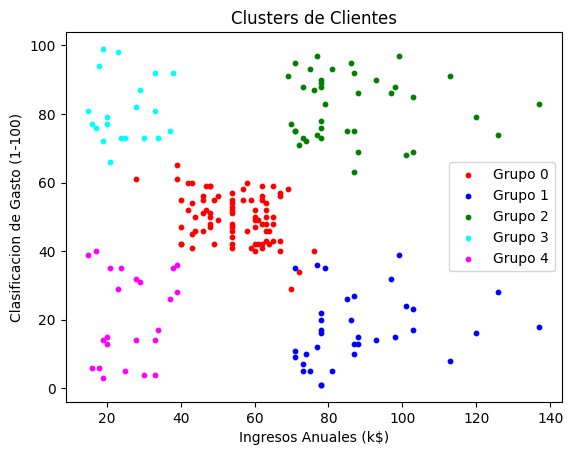

In [23]:
plt.scatter(X[y_hc == 0, 1], X[y_hc == 0, 2], s = 10, c = 'red', label = 'Grupo 0')
plt.scatter(X[y_hc == 1, 1], X[y_hc == 1, 2], s = 10, c = 'blue', label = 'Grupo 1')
plt.scatter(X[y_hc == 2, 1], X[y_hc == 2, 2], s = 10, c = 'green', label = 'Grupo 2')
plt.scatter(X[y_hc == 3, 1], X[y_hc == 3, 2], s = 10, c = 'cyan', label = 'Grupo 3')
plt.scatter(X[y_hc == 4, 1], X[y_hc == 4, 2], s = 10, c = 'magenta', label = 'Grupo 4')

plt.title('Clusters de Clientes')
plt.xlabel('Ingresos Anuales (k$)')     
plt.ylabel('Clasificacion de Gasto (1-100)') 
plt.legend()
plt.show()

#### Conclusiones

- El grupo de clientes en color verde, lo cuales tienen ingresos altos y una puntuación alta, por lo que podrían ser un grupo objetivo para ciertas promociones.
- En purpura tenemos a los clientes de baja puntuación y bajos ingresos.
- Mientras que en celeste, a los clientes con ingresos bajos pero con alta puntuación, lo cual podría indicar que estos clientes compran mucho a pesar de los ingresos bajos.

Caracteristicas de cada grupo

In [24]:
df["Cluster"] = y_hc
df.head()

,Genero,Edad,Ingresos,ScoreGasto,genero,Cluster
0,Male,19,15,39,1,4
1,Male,21,15,81,1,3
2,Female,20,16,6,0,4
3,Female,23,16,77,0,3
4,Female,31,17,40,0,4


In [25]:
df = df.drop(columns=['genero'])
df.head()

,Genero,Edad,Ingresos,ScoreGasto,Cluster
0,Male,19,15,39,4
1,Male,21,15,81,3
2,Female,20,16,6,4
3,Female,23,16,77,3
4,Female,31,17,40,4


In [26]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)
df.groupby('Cluster').describe().T

Cluster           0   1   2  3  4
Edad       count 83  35  39 20 23
           mean  42  42  33 25 45
           std   17  11   4  5 13
           min   18  19  27 18 19
           25%   27  35  30 21 36
           50%   45  43  32 23 46
           75%   54  48  36 29 54
           max   70  59  40 35 67
Ingresos   count 83  35  39 20 23
           mean  55  88  87 25 26
           std   10  16  16  7  8
           min   28  71  69 15 15
           25%   48  78  76 19 20
           50%   54  85  79 24 25
           75%   62  98  95 31 33
           max   76 137 137 38 39
ScoreGasto count 83  35  39 20 23
           mean  50  17  82 81 21
           std    7  10   9 10 13
           min   29   1  63 66  3
           25%   44  10  74 73 10
           50%   50  16  83 78 17
           75%   55  24  90 88 34
           max   65  39  97 99 40